# Pre-processing

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imshow_collection
from PIL import Image
import cv2
import os
from os import listdir
import tensorflow as tf
import keras
from keras.datasets import mnist
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import glob 
import imutils
import skimage
from skimage import data
from skimage import filters
from skimage.segmentation import slic, mark_boundaries
from skimage.color import rgb2gray
from skimage import io 
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import *
from pylab import *
import pathlib
import pytesseract


2022-03-03 01:45:34.555987: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mehdi/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-03-03 01:45:34.556031: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Importing Data

In [2]:
#Setting Directory
currentWorkingDir = os.path.dirname(os.getcwd())
print(currentWorkingDir)
currentWorkingDir = os.path.join(currentWorkingDir, "PI/Dataset/300")
print(currentWorkingDir)
for dirname, _, filenames in os.walk(currentWorkingDir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/mehdi/Bureau
/home/mehdi/Bureau/PI/Dataset/300
/home/mehdi/Bureau/PI/Dataset/300/Cheque 120611.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309094.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309099.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309112.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309142.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309084.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309155.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309105.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 083659.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 100831.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309066.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 100829.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309136.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309127.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309080.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309133.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 083655.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309090.tif
/home/mehdi

In [3]:
#currentWorkingDirAmount = os.path.dirname(os.getcwd())
#print(currentWorkingDirAmount)
#currentWorkingDirAmount = os.path.join(currentWorkingDirAmount, "PI/segmentationTest/amount")
#print(currentWorkingDirAmount)
#for dirname, _, filenames in os.walk(currentWorkingDirAmount):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
#dataset_path_amount = currentWorkingDirAmount
#checks_path_amount = os.path.join(dataset_path_amount,'*')
#checks_path_amount = glob.glob(checks_path_amount)
#print(checks_path_amount)        

In [4]:
dataset_path = currentWorkingDir
checks_path = os.path.join(dataset_path,'*')
checks_path = glob.glob(checks_path)
print(checks_path)

['/home/mehdi/Bureau/PI/Dataset/300/Cheque 120611.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309094.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309099.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309112.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309142.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309084.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309155.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309105.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 083659.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 100831.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309066.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 100829.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309136.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309127.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309080.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309133.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 083655.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309090.tif', '/home/me

In [5]:
print(len(checks_path))
initial_count = 0
for path in pathlib.Path(dirname).iterdir():
    if path.is_file():
        initial_count += 1
print(initial_count)

112
112


# Cheque Visualisation

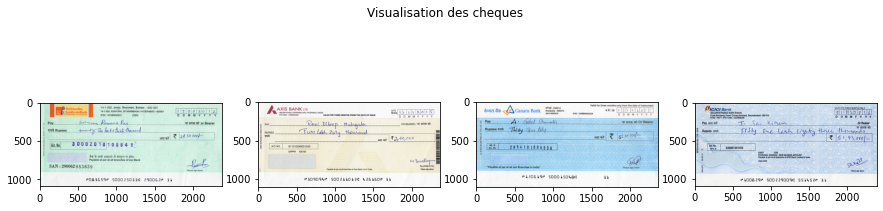

In [6]:
image_from_list = []
image_from_list.append(io.imread(checks_path[8]))   
image_from_list.append(io.imread(checks_path[1]))  
image_from_list.append(io.imread(checks_path[77]))
image_from_list.append(io.imread(checks_path[11]))
i, (im1,im2,im3,im4) = plt.subplots(1,4)
i.suptitle("Visualisation des cheques")
i.set_figwidth(15)
im1.imshow(image_from_list[0])
im2.imshow(image_from_list[1])
im3.imshow(image_from_list[2])
im4.imshow(image_from_list[3])

# RGB Plot for cheque

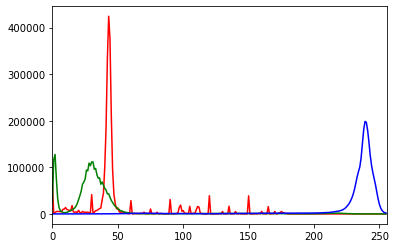

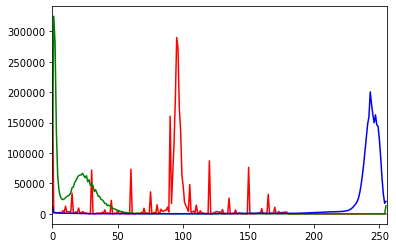

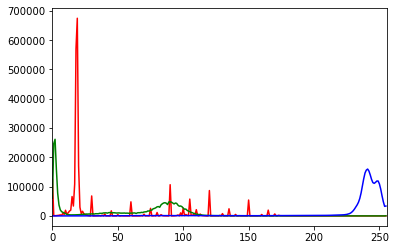

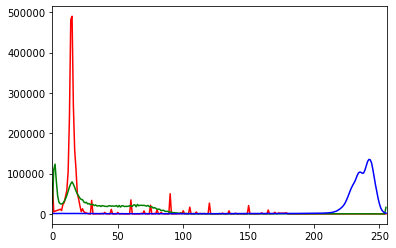

In [7]:
for j in range(0,len(image_from_list)):    
    hsv = cv2.cvtColor(image_from_list[j], cv2.COLOR_BGR2HSV)
    color = ('r','g','b')
    labels = ('h','s','v')
    for i,col in enumerate(color):
        hist = cv2.calcHist([hsv],[i],None,[256],[0,256])
        plt.plot(hist,color = col,label=labels[i])
        plt.xlim([0,256])
    plt.show()

# Import Random Cheque

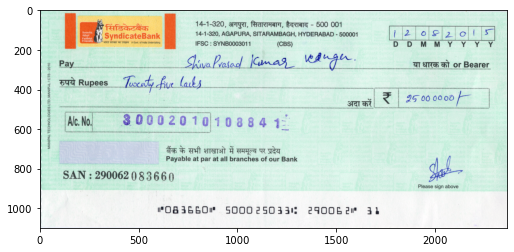

In [8]:
import random
randomi = random.randint(0,112)
image = io.imread(checks_path[randomi])  
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

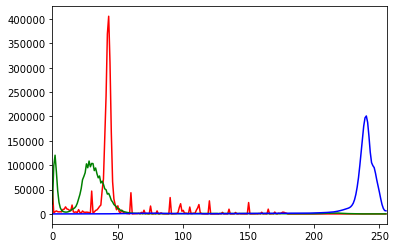

In [9]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
color = ('r','g','b')
labels = ('h','s','v')
for i,col in enumerate(color):
    hist = cv2.calcHist([hsv],[i],None,[256],[0,256])
    plt.plot(hist,color = col,label=labels[i])
    plt.xlim([0,256])
plt.show()

## Data Pre-processing ##

### Noise Reduce

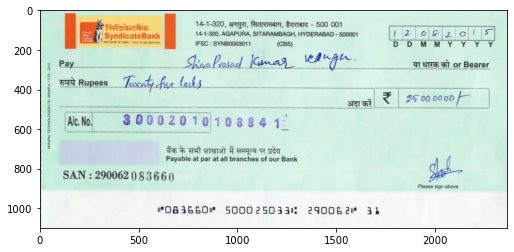

In [10]:
#Noise Reduce
from skimage.filters import gaussian

image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
cv2.imwrite('dhia/image_black_nonoise2.png', image)
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

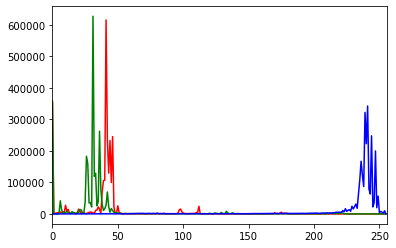

In [11]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
color = ('r','g','b')
labels = ('h','s','v')
for i,col in enumerate(color):
    hist = cv2.calcHist([hsv],[i],None,[256],[0,256])
    plt.plot(hist,color = col,label=labels[i])
    plt.xlim([0,256])
plt.show()

## RGB Channels

Text(0.5, 0.98, 'Original & RGB image channels')

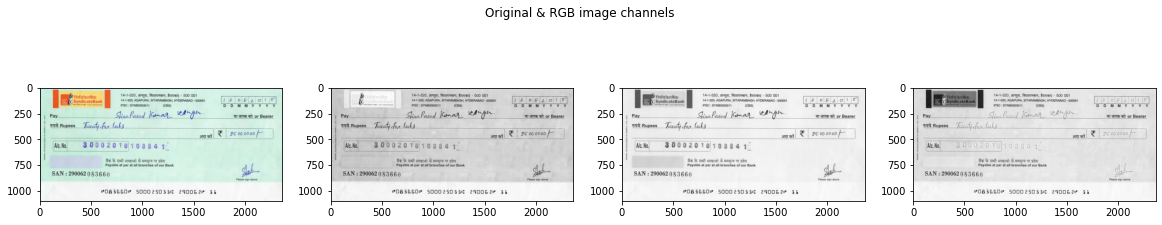

In [12]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4)
i.set_figwidth(20) 
im1.imshow(image)  #Original image
im2.imshow(cv2.cvtColor(image[:, : , 0], cv2.COLOR_BGR2RGB)) #Red
im3.imshow(cv2.cvtColor(image[:, : , 1], cv2.COLOR_BGR2RGB)) #Green
im4.imshow(cv2.cvtColor(image[:, : , 2], cv2.COLOR_BGR2RGB)) #Blue
i.suptitle('Original & RGB image channels')

#### According to our RGB plots, we noticed that the degree of pixels of green is giving a better output compared with degree of red and blue

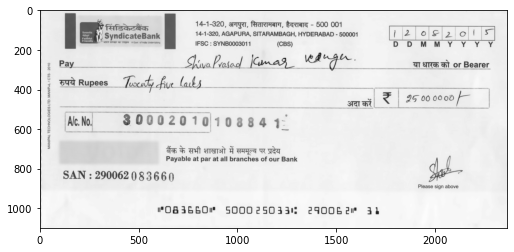

In [13]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
gr_image = cv2.cvtColor(image[:, : , 1], cv2.COLOR_BGR2RGB)
imshow(gr_image)

## Gray Scale

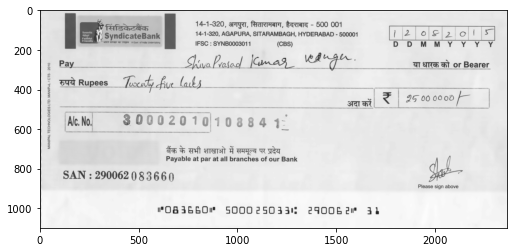

In [14]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('dhia/image_grayscale.png', gray_image)

i, (im1) = plt.subplots(1)
i.set_figwidth(15)
imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))

## Closing (From Erosing followed by Dilation)

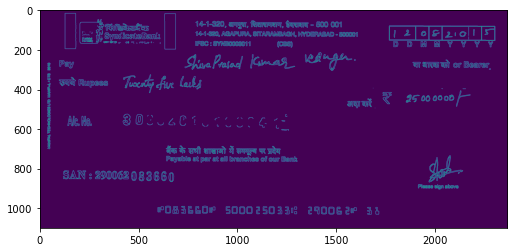

In [15]:
canny_image = cv2.Canny(gray_image,150,200)
cv2.imwrite('dhia/image_canny.png', canny_image)

i, (im1) = plt.subplots(1)
i.set_figwidth(25)
canny_image = cv2.Canny(gray_image,250,300)
imshow(canny_image)

### Erosion and Dilation 

True

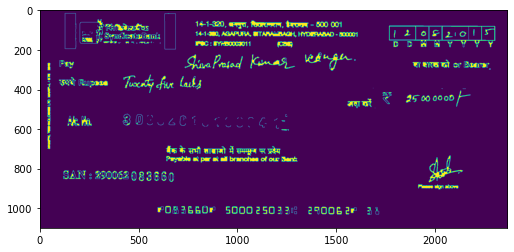

In [16]:
#Erosion and Dilation 
i, (im1) = plt.subplots(1)
i.set_figwidth(45)
kernel = np.ones((5,5),np.uint8)
dilate_image = cv2.dilate(canny_image,kernel, iterations=1)
erode_image = cv2.erode(dilate_image,kernel, iterations=1)
imshow(erode_image)
cv2.imwrite('dhia/erode.png', erode_image)
cv2.imwrite('dhia/dilate.png', dilate_image)

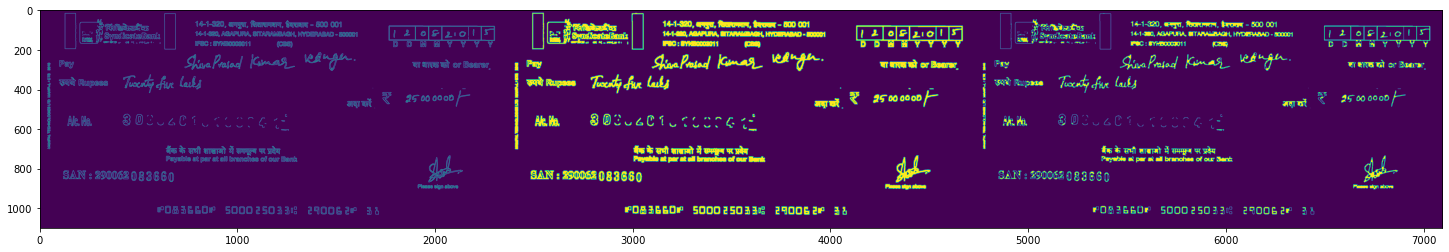

In [17]:
i, (im1) = plt.subplots(1)
i.set_figwidth(45)
display = np.hstack((canny_image,dilate_image,erode_image))
imshow(display)

## Black and White Conversion

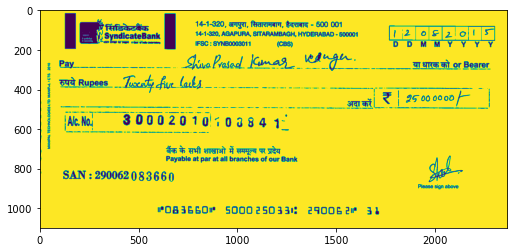

In [18]:
# convert image to black and white
thresh, image_black = cv2.threshold(gray_image, 170, 255, cv2.THRESH_BINARY)
# store output images
cv2.imwrite('dhia/image_black.png', image_black)

i, (im1) = plt.subplots(1)
i.set_figwidth(45)
imshow(image_black)

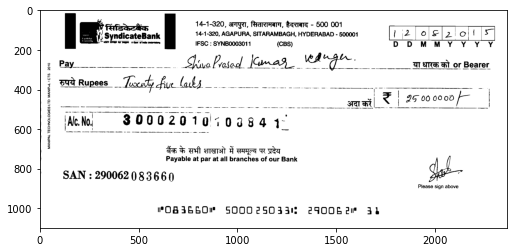

In [19]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
imshow(cv2.cvtColor(image_black, cv2.COLOR_BGR2RGB))

## Normalisation

In [20]:
#normalization
#norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
#i, (im1) = plt.subplots(1)
#i.set_figwidth(15)
#cv2.imwrite('dhia/norm.png',norm_image)
#print(norm_image)
#im1.imshow(norm_image)

## Noise Remove

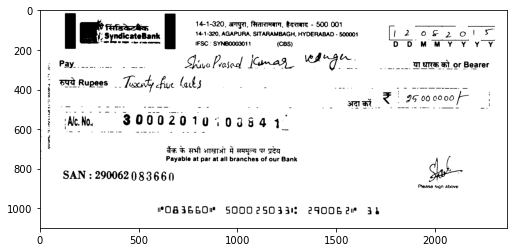

In [21]:
def remove_noise(image):
    return cv2.medianBlur(image,5)

nv_image=remove_noise(image_black)
cv2.imwrite('dhia/image_black_nonoise.png', nv_image)

i, (im1) = plt.subplots(1)
i.set_figwidth(15)
imshow(cv2.cvtColor(nv_image, cv2.COLOR_BGR2RGB))

### Erode

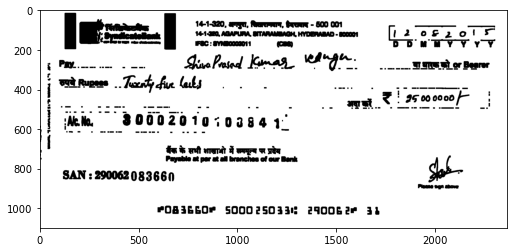

In [22]:
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

cv2.imwrite('dhia/erode.png', erode(nv_image))

i, (im1) = plt.subplots(1)
i.set_figwidth(15)
imshow(erode(cv2.cvtColor(nv_image, cv2.COLOR_BGR2RGB)))

## Open (Dilation followed by Erosion)

In [23]:
# close all windows to cleanup the screen, then initialize a list of
# of kernels sizes that will be applied to the image
kernelSizes = [(3, 3), (5, 5), (7, 7)]
# loop over the kernels sizes
i=0
for kernelSize in kernelSizes:
    i = i+1
# construct a rectangular kernel from the current size and then
# apply an "opening" operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    opening = cv2.morphologyEx(canny_image, cv2.MORPH_OPEN, kernel)
    cv2.imwrite("dhia/open"+str(i)+".png",opening)

## Images characteristics 

In [24]:
ex1=image.size

ex2=nv_image.size

ex3 = image_black.size

feature1 = pd.Series([ex1], index=['Nb pixels'])
feature2 = pd.Series([ex2], index=['Nb pixels'])
feature3 = pd.Series([ex3], index=['Nb pixels'])

ImgFeatures = pd.DataFrame({'Original': feature1, 'N&B': feature2 , 'Black': feature2})
ImgFeatures

,Original,N&B,Black
Nb pixels,7804500,2601500,2601500


# Variance

In [25]:
#La variance permet de décrire comment les niveaux de gris de l’image sont répartis autour de la moyenne.
v1=np.var(image, axis=(-1, -2))
print(v1)

v2=np.var(gray_image, axis=(-1, -2))
print(v2)

v3=np.var(image_black, axis=(-1, -2))
print(v3)
#valeur tres grande indique qu'il y a un contraste 
#Ecart type: L'écart type est une mesure de la façon dont les niveaux de gris dans l’image sont répartis.
st1=np.std(image)
print(st1)

st2=np.std(gray_image)
print(st2)

st3=np.std(image_black)
print(st3)
#les niveaux de gris sont dispersés

[111.70009411 112.79740507 116.0542591  ...   7.56824948   7.30547455
   7.12849007]
1155.9673955894775
3921.5729180133085
36.13494637634721
33.99952051999377
62.62246336589857


In [26]:
feature1 = pd.Series([v1,v2,v3], index=['cheque_RGB','cheque_grayscale','cheque_black&white'])
feature2 = pd.Series([st1,st2,st3], index=['cheque_RGB','cheque_grayscale','cheque_black&white'])

ImgFeatures = pd.DataFrame({'Variance': feature1, 'std': feature2})
ImgFeatures

,Variance,std
cheque_RGB,"[111.70009411187442, 112.79740507488971, 116.0...",36.134946
cheque_grayscale,1155.967396,33.999521
cheque_black&white,3921.572918,62.622463


In [27]:
# opening a  image 
im = Image.open('dhia/image_black.png')
  
# getting colors 
# multiband images (RBG) 
im1 = Image.Image.getcolors(im) 
  
print(im1) 

#Notre image contient 182905 pixels en noir (0) et 2418595 pixels en blanc (255)

[(167704, 0), (2433796, 255)]


## Data Augmentation

## Segmentaion ##

Text(0.5, 0.98, 'Original & Seuillage binaire sur les canals')

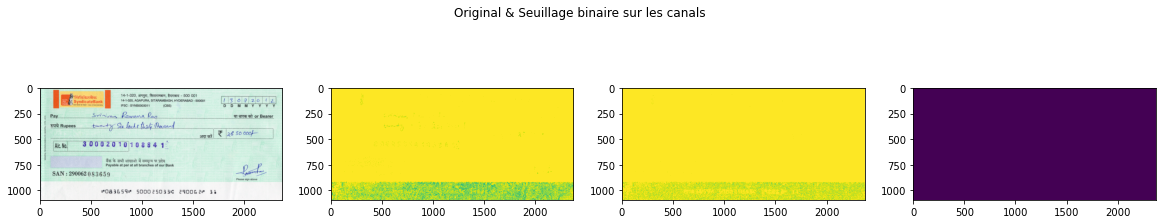

In [28]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4)
i.set_figwidth(20) 



hsv = cv2.cvtColor(image_from_list[0], cv2.COLOR_BGR2HSV)
h,s,v= cv2.split(hsv)
ret_h, th_h = cv2.threshold(h,0,255,cv2.THRESH_BINARY)
ret_s, th_s = cv2.threshold(s,0,255,cv2.THRESH_BINARY)
ret_v, th_v = cv2.threshold(v,0,255,cv2.THRESH_BINARY)

im1.imshow(image_from_list[0])  #Original image
im2.imshow(th_h)  #Seuillage automatique sur le canal hue
im3.imshow(th_s)  #Seuillage automatique sur le canal Saturation
im4.imshow(th_v)  #Seuillage automatique sur le canal Luminosité
i.suptitle('Original & Seuillage binaire sur les canals')

Text(0.5, 0.98, 'Original & Seuillage d OTSU automatique sur les canals')

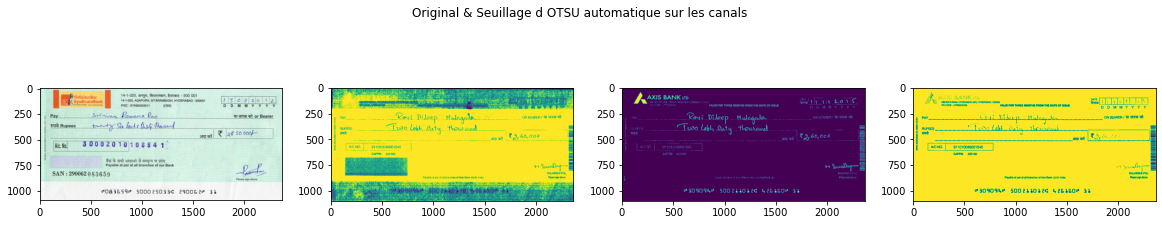

In [29]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4)
i.set_figwidth(20) 



hsv = cv2.cvtColor(image_from_list[1], cv2.COLOR_BGR2HSV)
h,s,v= cv2.split(hsv)
ret_h, th_h = cv2.threshold(h,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret_s, th_s = cv2.threshold(s,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret_v, th_v = cv2.threshold(v,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

im1.imshow(image_from_list[0])  #Original image
im2.imshow(th_h)  #Seuillage automatique sur le canal hue
im3.imshow(th_s)  #Seuillage automatique sur le canal Saturation
im4.imshow(th_v)  #Seuillage automatique sur le canal Luminosité

cv2.imwrite("dhia/threshS.png",th_s)
cv2.imwrite("dhia/threshH.png",th_h)
cv2.imwrite("dhia/threshV.png",th_v)
i.suptitle('Original & Seuillage d OTSU automatique sur les canals')

In [30]:
kernelSizes = [(2, 2), (5, 5), (7, 7)]
# loop over the kernels sizes
i=0
for kernelSize in kernelSizes:
    i = i+1
# construct a rectangular kernel from the current size and then
# apply an "opening" operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    opening = cv2.morphologyEx(th_s, cv2.MORPH_OPEN, kernel)
    cv2.imwrite("dhia/open"+str(i)+".png",opening)

In [31]:
imageTest = cv2.imread(currentWorkingDir+"/Cheque 100828.tif")
openTest = cv2.imread("dhia/open1.png")

True

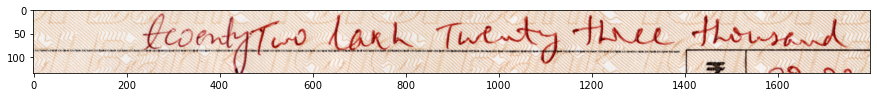

In [32]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
y=310
x=320
h=135
w=1800
def ExtractAmount(openTest,x,y,w,h):
    return (openTest[y:y+h, x:x+w])

legal_amount = ExtractAmount(imageTest,x,y,w,h)
imshow(legal_amount)
cv2.imwrite('dhia/legal_amount.png', legal_amount)

## Find Contours

In [33]:
amount1 = cv2.imread('dhia/legal_amount.png',3)
imgray = cv2.cvtColor(amount1,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

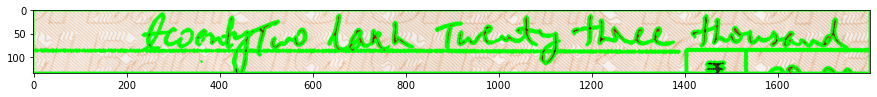

In [34]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)

cv2.drawContours(amount1, contours, -1, (0, 255, 0), 3)
plt.imshow(amount1)

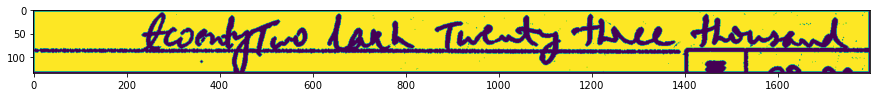

In [35]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
gray_image = cv2.cvtColor(amount1, cv2.COLOR_BGR2GRAY)
thresh, image_black = cv2.threshold(gray_image, 170, 255, cv2.THRESH_BINARY)
plt.imshow(image_black)

# Delete Lines

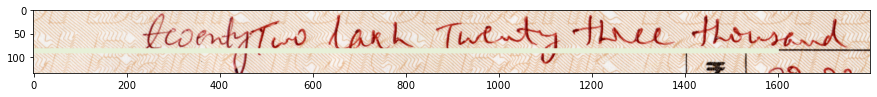

In [36]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
img = cv2.imread('dhia/legal_amount.png',3)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,30,10,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/120,50)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1600*(-b))
    y1 = int(y0 + 1600*(a))
    x2 = int(x0 - 1600*(-b))
    y2 = int(y0 - 1600*(a))
    cv2.line(img,(x1,y1),(x2,y2),(231, 240, 216),10)
    
plt.imshow(img)

True

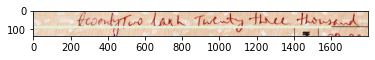

In [37]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]


repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - img, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

imshow(result)
cv2.imwrite("aasba.png",result)

In [46]:
#Removing Top 
RemoveLine = cv2.imread('dhia/legal_amount.png',1)
gray_image = cv2.cvtColor(RemoveLine, cv2.COLOR_BGR2GRAY)
thresh, image_black = cv2.threshold(gray_image, 170, 255, cv2.THRESH_BINARY)
# store output images
cv2.imwrite('dhia/bwamount.png',image_black)
for y in range(50):
    for x in range(1800):
        countBlack = 0
        b = image_black[y,x]
        if ((b==0) and (x<1800-50)):
            for t in range(x+100):
                rNext,gNext,bNext = RemoveLine[y,t]
                if ((rNext<210) and (gNext<230) and (bNext<230)):
                    countBlack = countBlack + 1
                    #print(countBlack)
            if (countBlack>50):        
                RemoveLine[y,x] = (255,255,255)
        #inv = 255 - c
        #Image.putpixel(RemoveLine, (x, y), inv)
imshow(RemoveLine)
cv2.imwrite('dhia/yed.png',RemoveLine)

255


In [39]:
legal_amount = cv2.imread('dhia/legal_amount.png',3)
gray = cv2.cvtColor(legal_amount,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
kernel = np.ones((5,5),np.uint8)

thresh = cv2.dilate(thresh,kernel, iterations=1)

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(legal_amount, [c], -1, (255,255,255), 2)
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - legal_amount, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

cv2.imwrite("resultAmount.png",result)
cv2.imwrite("thresh.png",thresh)

True

In [40]:
import cv2
import numpy as np
from skimage.morphology import reconstruction

def imfill(img):
    seed = np.ones_like(img)*255
    img[ : ,0] = 0
    img[ : ,-1] = 0
    img[ 0 ,:] = 0
    img[ -1 ,:] = 0
    seed[ : ,0] = 0
    seed[ : ,-1] = 0
    seed[ 0 ,:] = 0
    seed[ -1 ,:] = 0
    fill_img = reconstruction(seed, img, method='erosion')
    return fill_img

img = cv2.imread('dhia/legal_amount.png', cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
img_thresh = cv2.threshold(img, 0, 255,  cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]  # Convert to B/W
fill_img = imfill(img_thresh)

cv2.imwrite('aasba3.png',img_thresh)
cv2.imwrite('aasba2.png',fill_img)

True

for i in range(0,len(checks_path)):
    image = cv2.imread(checks_path[i])
    image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #canny_image = cv2.Canny(gray_image,150,200)
    #dilate_image = cv2.dilate(canny_image,kernel, iterations=1)
    #image = cv2.erode(dilate_image,kernel, iterations=1)

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h,s,v= cv2.split(hsv)
    
    ret_h, th_h = cv2.threshold(h,0,255,cv2.THRESH_OTSU)
    ret_s, th_s = cv2.threshold(s,0,255,cv2.THRESH_OTSU)
    ret_v, th_v = cv2.threshold(v,0,255,cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
    opening = cv2.morphologyEx(th_v, cv2.MORPH_OPEN, kernel)
    cv2.imwrite("dhia/test/open"+str(i)+".png",opening)